In [11]:
import sys
!{sys.executable} -m pip install scipy
import sys
!{sys.executable} -m pip install numpy
import sys
!{sys.executable} -m pip install pandas
import sys
!{sys.executable} -m pip install matplotlib
import sys
!{sys.executable} -m pip install sklearn
import sys
!{sys.executable} -m pip install statsmodels

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [54]:
from pandas import Series 

In [55]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [56]:
from pandas import Series
import pandas as pd
#series = Series.from_csv("D:\\ISB\\Term 3 - 5th Residency\\Practicum\\TEMP\\Output2.csv", header=0,encoding ='utf-8')

df = pd.read_csv("D:\\ISB\\Term 3 - 5th Residency\\Practicum\\TEMP\\Output1.csv",encoding ='utf-8')
df.head(5)


,Slno,Date,Amt_pos_cc,Amt_atm_cc,Amt_pos_dc,Amt_atm_dc
0,3,01 04 2011,963.720952,70553.98076,1061653.472,37055.43341
1,4,01 05 2011,1002.072860,78809.93213,1126314.466,42013.60313
2,5,01 06 2011,960.364053,71911.07963,1098540.788,37838.84446
3,6,01 07 2011,967.220625,74717.63030,1127437.314,42325.65758
4,7,01 08 2011,1088.498112,80789.83905,1122738.914,45605.18255


In [57]:
#train = df[0:72]
#test = df[72:]

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [51]:
# Changing the date column to a Time Interval columnn
#df.date = pd.DatetimeIndex(df.Date)
# Change the index to the date column
#df.index = pd.PeriodIndex(df.Date, freq='M')
# Sort the data frame by date
#df = df.sort_values(by = "Date")

#df.head()

,Slno,Date,Amt_pos_cc,Amt_atm_cc,Amt_pos_dc,Amt_atm_dc
9,9,01 01 2012,1089.362001,88676.98647,1209807.879,50611.02003
21,21,01 01 2013,1228.136548,113920.31070,1494745.250,80154.61898
33,33,01 01 2014,1505.736892,141620.33400,1722318.045,84977.59171
45,45,01 01 2015,2144.199798,173528.40290,1924679.940,112952.28990
57,57,01 01 2016,2655.662688,211734.74640,2181881.523,146107.52950


### My analysis will most be concentrated on Amount of transactiosn using debit card ####

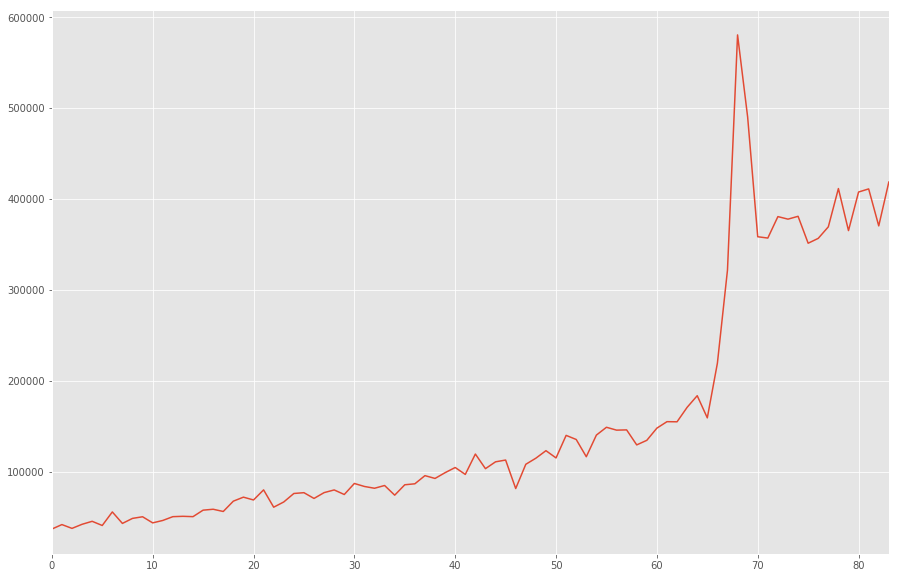

In [60]:
df.Amt_atm_dc.plot()

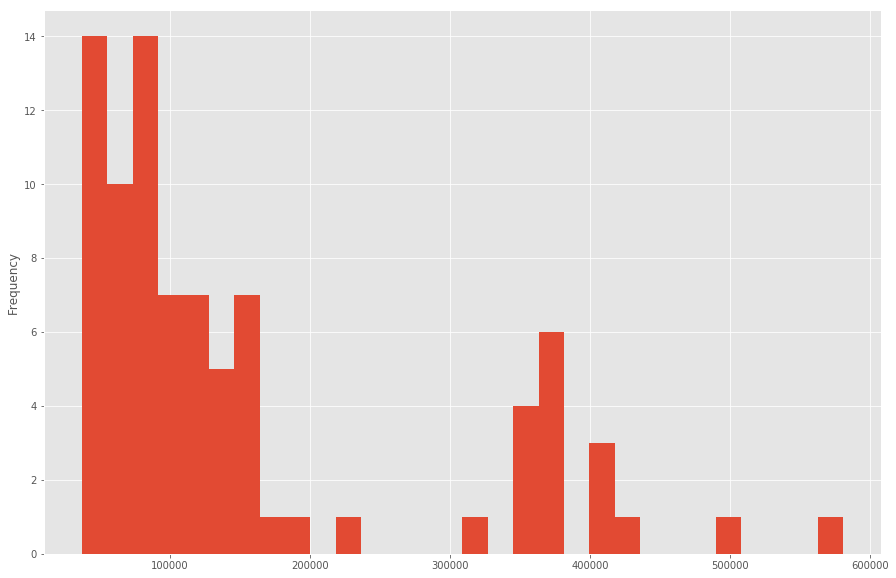

In [61]:
df.Amt_atm_dc.plot(kind = "hist", bins = 30)


In [62]:
#Taking log might reduce the variance 

df['Amt_atm_dc_Log'] = np.log(df.Amt_atm_dc)
df.head()

,Slno,Date,Amt_pos_cc,Amt_atm_cc,Amt_pos_dc,Amt_atm_dc,Amt_atm_dc_Log
0,3,01 04 2011,963.720952,70553.98076,1061653.472,37055.43341,10.520170
1,4,01 05 2011,1002.072860,78809.93213,1126314.466,42013.60313,10.645749
2,5,01 06 2011,960.364053,71911.07963,1098540.788,37838.84446,10.541091
3,6,01 07 2011,967.220625,74717.63030,1127437.314,42325.65758,10.653149
4,7,01 08 2011,1088.498112,80789.83905,1122738.914,45605.18255,10.727777


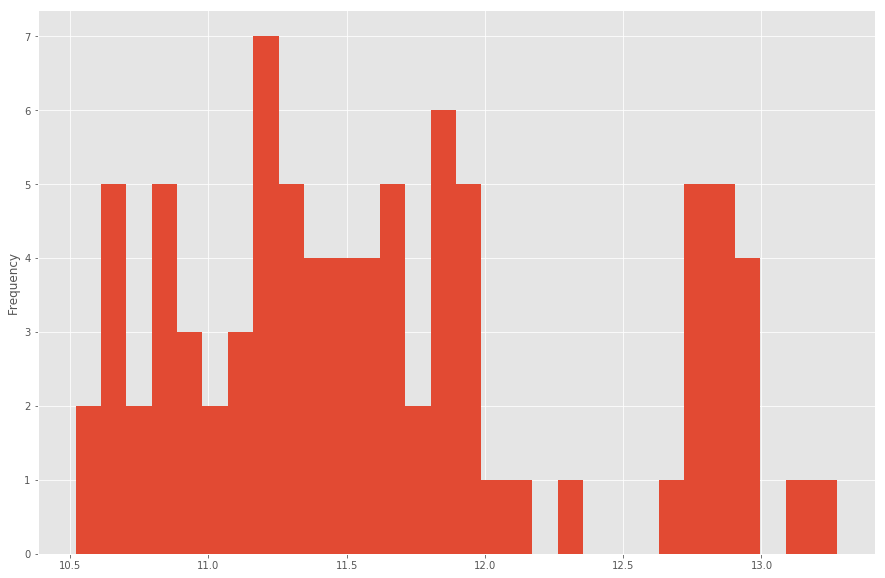

In [63]:
df.Amt_atm_dc_Log.plot(kind = "hist", bins = 30)


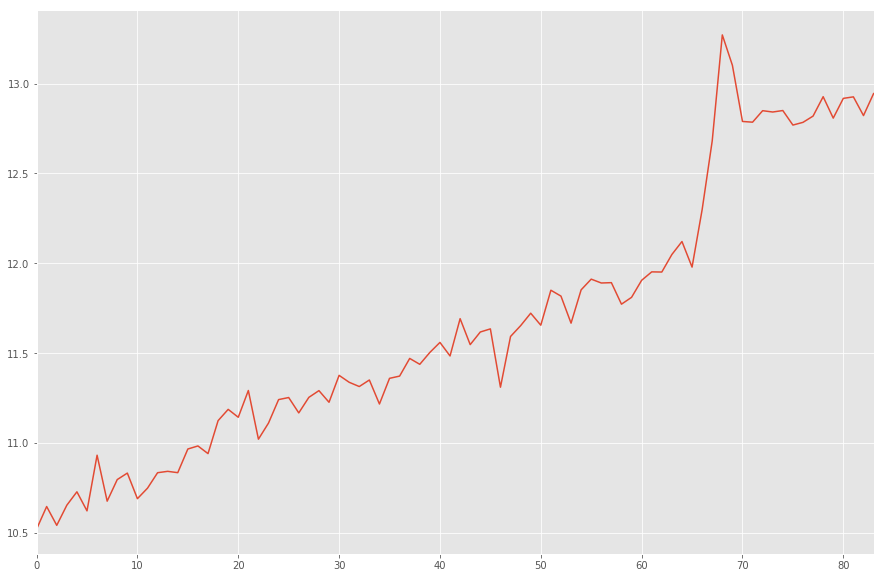

In [64]:
df.Amt_atm_dc_Log.plot()

In [65]:
#Moving average for 12 months 
df['Amt_atm_dc_Log_MA'] = pd.rolling_mean(df.Amt_atm_dc_Log, window = 12)


C:\Users\Pratim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


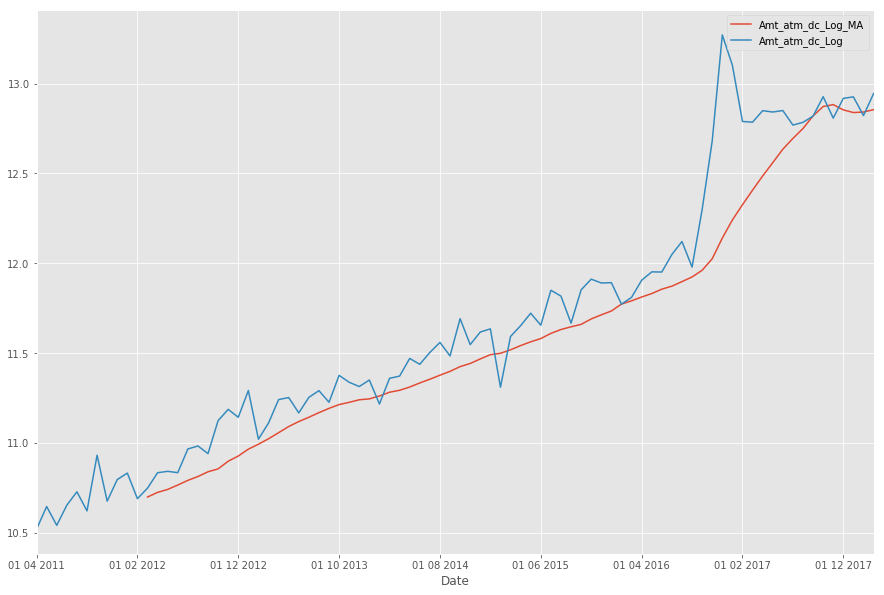

In [69]:
df.plot(kind ="line", x = "Date",y=["Amt_atm_dc_Log_MA", "Amt_atm_dc_Log"])


## We can see from the above diagram that the amt of transaction from debit cards has moved with a spike towards the end of 2016 during time of demonetization which is way above the moving average value  

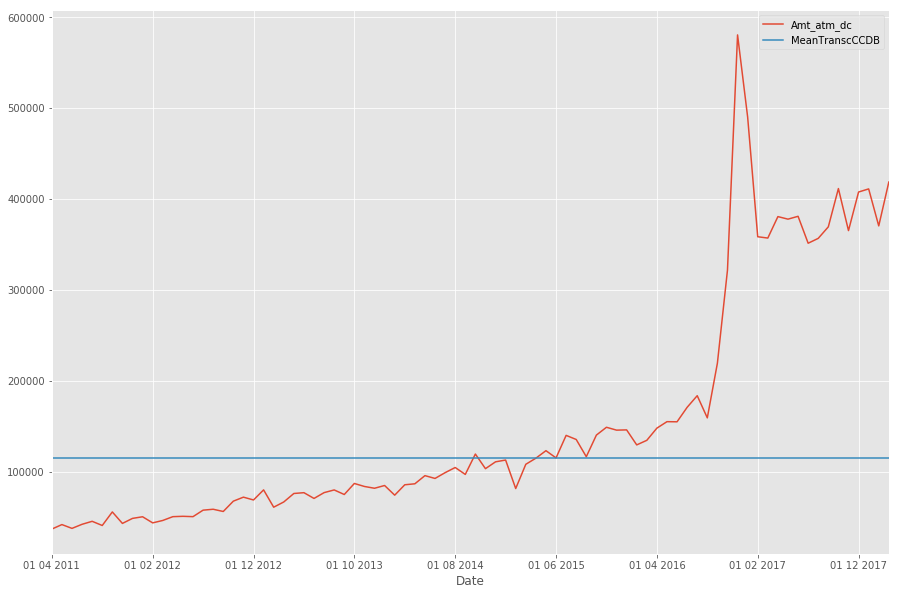

In [70]:
# Time series Model 

Pred_mean_model = df.Amt_atm_dc_Log.mean()

df["MeanTranscCCDB"] = np.exp(Pred_mean_model)

df.plot(kind = 'line',x = "Date",y = ["Amt_atm_dc","MeanTranscCCDB"])


### Let us try to do an ARIMA on transaction of Amt of transaction on debit card in ATM ##


In [74]:
#Let us drop other columns 

#df.drop["Slno","Amt_pos_cc","Amt_atm_cc","Amt_pos_dc"]

df.head()

,Slno,Date,Amt_pos_cc,Amt_atm_cc,Amt_pos_dc,Amt_atm_dc,Amt_atm_dc_Log,Amt_atm_dc_Log_MA,MeanTranscCCDB
0,3,01 04 2011,963.720952,70553.98076,1061653.472,37055.43341,10.520170,NaN,115105.18115
1,4,01 05 2011,1002.072860,78809.93213,1126314.466,42013.60313,10.645749,NaN,115105.18115
2,5,01 06 2011,960.364053,71911.07963,1098540.788,37838.84446,10.541091,NaN,115105.18115
3,6,01 07 2011,967.220625,74717.63030,1127437.314,42325.65758,10.653149,NaN,115105.18115
4,7,01 08 2011,1088.498112,80789.83905,1122738.914,45605.18255,10.727777,NaN,115105.18115


In [88]:
df_ar = df.drop(['Slno','Amt_pos_cc','Amt_atm_cc','Amt_pos_dc','Amt_atm_dc_Log','Amt_atm_dc_Log_MA','MeanTranscCCDB'],axis =1)

In [89]:
df_ar

,Date,Amt_atm_dc
0,01 04 2011,37055.43341
1,01 05 2011,42013.60313
2,01 06 2011,37838.84446
3,01 07 2011,42325.65758
4,01 08 2011,45605.18255
5,01 09 2011,41013.22450
6,01 10 2011,55910.61398
7,01 11 2011,43288.27623
8,01 12 2011,48818.97164
9,01 01 2012,50611.02003


In [94]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


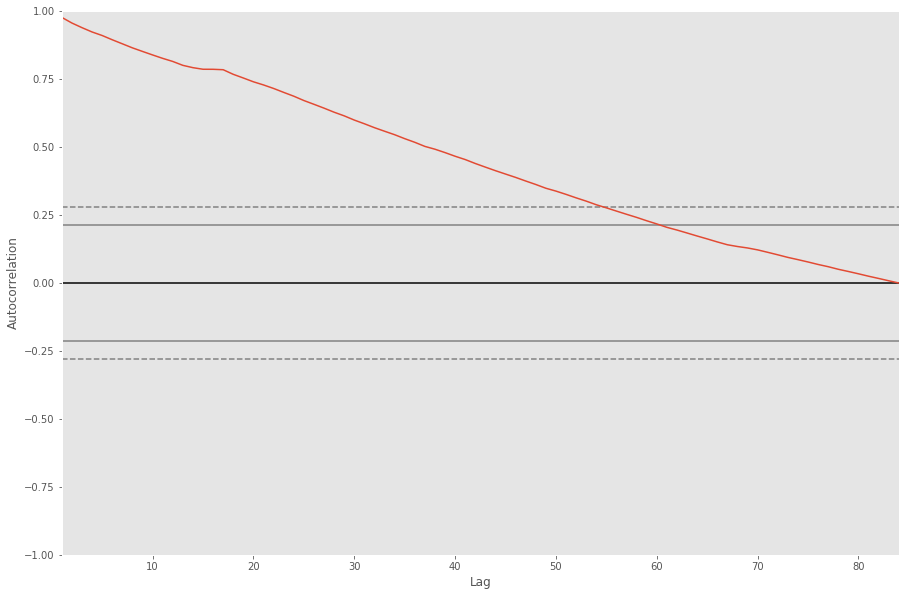

In [101]:
series = read_csv('D:\\ISB\\Term 3 - 5th Residency\\Practicum\\TEMP\\Output1.csv', header=0,index_col=1, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

In [103]:
from statsmodels.tsa.arima_model import ARIMA


In [106]:
# fit model
model = ARIMA(df_ar['Amt_atm_dc'],order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).